## Introduction

- **Context:**  
  The American economy is highly interconnected: industries both consume inputs from and provide outputs to each other. For example, agriculture relies on energy, while energy relies on manufacturing. Wassily Leontief developed the *input–output model* to capture these interdependencies using matrices.  

- **Research Question:**  
  What does the BEA input–output requirements matrix reveal about inter-industry dependencies in the U.S. economy?  

- **Data:**  
 The dataset used is “Total Requirements, Industry-by-Industry Summary Level” from the U.S. Bureau of Economic Analysis (BEA).  
  Source: [BEA Interactive Tables](https://apps.bea.gov/iTable/?reqid=1602&step=2&Categories=Core&isURI=1&_gl=1*rffd5b*_ga*OTc0NjMwNDI2LjE3NTgyNzg4NzI.*_ga_J4698JNNFT*czE3NTgyNzg4NzIkbzEkZzEkdDE3NTgyNzg5MzUkajU5JGwwJGgw#eyJhcHBpZCI6MTYwMiwic3RlcHMiOlsxLDIsMyw0XSwiZGF0YSI6W1siY2F0ZWdvcmllcyIsIkNvcmUiXSxbIlRhYmxlX0xpc3QiLCJJeElUUkFSIl0sWyJSYkRldGFpbEx2bCIsIlNVTSJdXX0=).  
  This dataset provides a square matrix where each cell represents how much input from one industry is required to produce one unit of output in another industry.


## Simple data exploration

- Step 1: Load the CSV file and remove metadata rows.  
- Step 2: Show the shape of the dataset (71×71 matrix).  
- Step 3: Clean Data and Load Heatmap.  
- Step 4: Briefly describe the findings from the matrix visualization.  

# Visualization: Heatmap of Inter-Industry Dependencies

- **Explain what you show, might require math:**  
  The dataset can be represented as a square matrix A.  
  - Rows = industries supplying inputs.  
  - Columns = industries demanding outputs.  
  - Entries ($a_{ij}$) = how much input from industry *i* is required to produce one unit of industry *j*’s output.

 
  Each cell in the matrix represents how much input from industry i is required to produce one unit of output in industry j.

The dataset used in this project is derived from the Leontief input–output model, which mathematically represents how industries depend on each other. The model is expressed as:

$$x = A x + d$$

where \(A\) is the matrix of inter-industry coefficients, \(x\) represents total output, and \(d\) is final demand.  
Although this project does not solve the equation directly, the heatmap below visualizes the values of \(A\), showing how inputs from one industry are required to produce outputs in another.



  A heatmap provides a visual way to interpret these interdependencies. Darker cells indicate stronger dependence between industries.

- **Show:**  
  A heatmap of the entire 71×71 BEA requirements matrix.


In [2]:
# Load and clean the BEA input–output dataset
# The goal: get a clean 71×71 numeric matrix ready for visualization

import pandas as pd

# 1) Load the dataset, skipping the first 3 metadata rows
df = pd.read_csv("Leontief_Matrix.csv", skiprows=3)

# 2) Remove the first two text columns (industry codes + descriptions)
matrix = df.drop(columns=df.columns[:2])

# 3) Drop the first leftover text row (e.g., "Industry Description")
matrix = matrix.drop(index=0)

# 4) Convert all values to numeric (turn non-numbers into NaN)
matrix = matrix.apply(pd.to_numeric, errors="coerce")

# 5) Remove any empty rows or columns
matrix = matrix.dropna(axis=0, how="all").dropna(axis=1, how="all")

# 6) If there’s still an extra row (like a totals row), trim it
if matrix.shape[0] > matrix.shape[1]:
    matrix = matrix.iloc[:matrix.shape[1], :]

# 7) Show the final shape which should be a square matrix so the rows are the same amount as the columns 
print("Matrix shape:", matrix.shape)



Matrix shape: (71, 71)


@fig-label-to-make-reference below visualizes the matrix (A) from the equation above as a heatmap, showing how industries depend on each other through their input–output relationships.

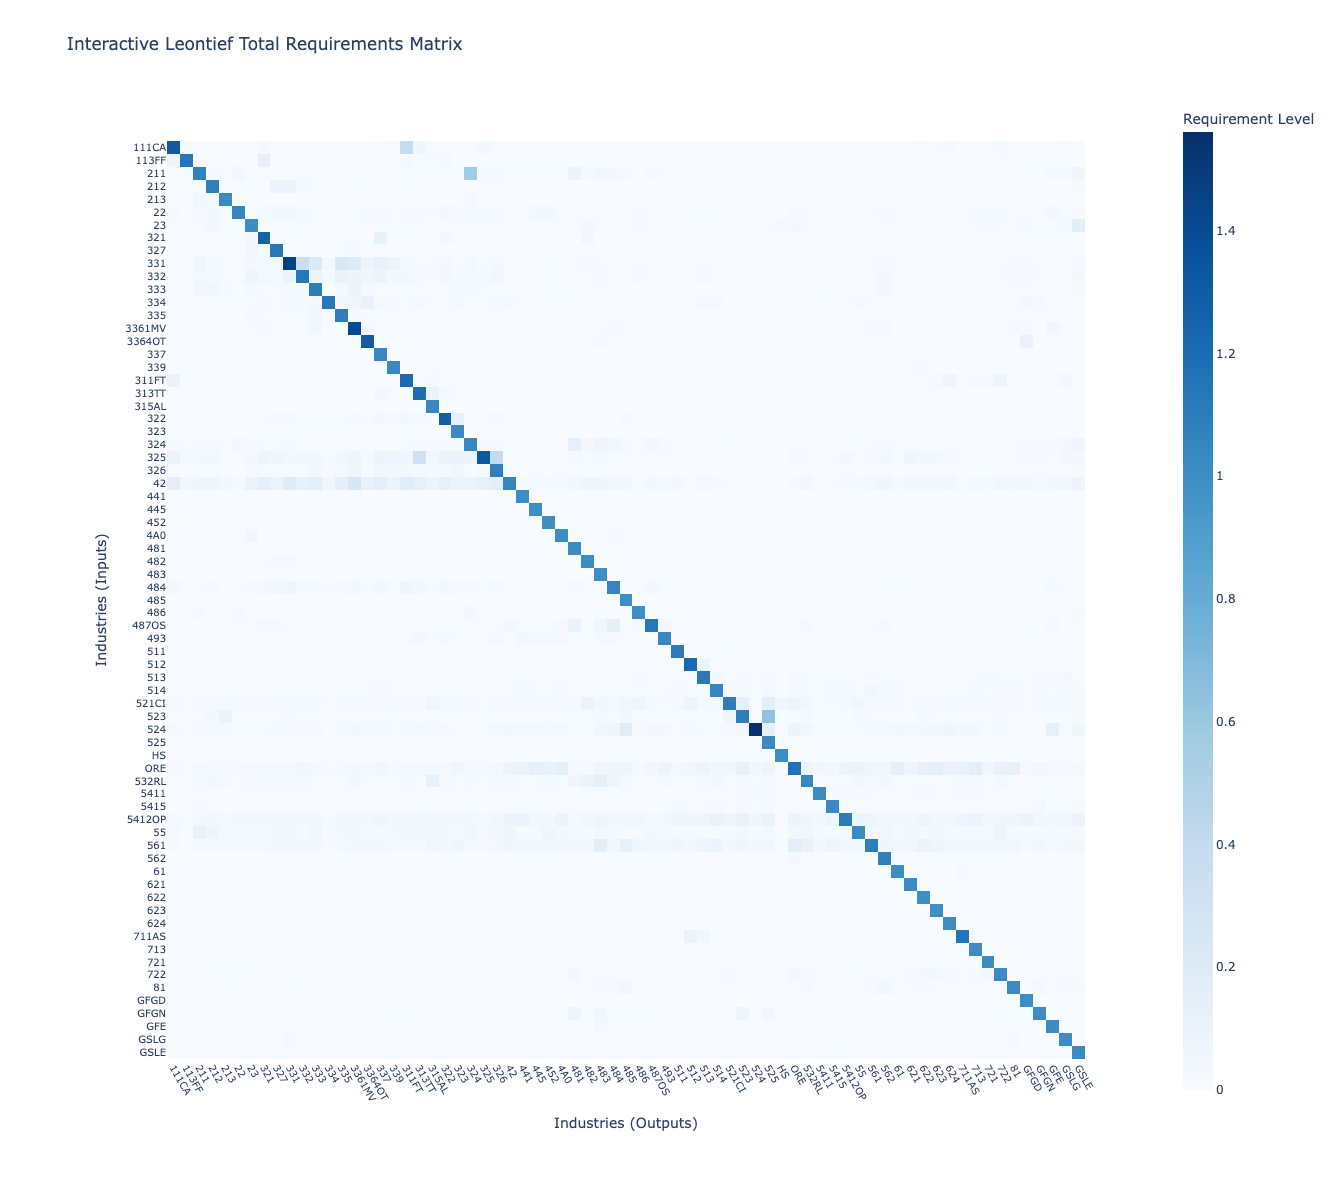

In [103]:
# | label: fig-label-to-make-reference
# | fig-cap: "Interactive Heatmap of Inter-Industry Dependencies"

import plotly.express as px

# Create an interactive, zoomable heatmap
fig = px.imshow(
    matrix,
    labels=dict(
        x="Industries (Outputs)",
        y="Industries (Inputs)",
        color="Requirement Level"
    ),
    x=matrix.columns,
    y=matrix.columns,
    color_continuous_scale="Blues",
    title="Interactive Leontief Total Requirements Matrix"
)

# Make it better in regards to appearance
fig.update_layout(
    width=1200,          # make the figure much wider
    height=1200,         # and taller for readability
    font=dict(size=12),  # slightly larger text
    margin=dict(l=100, r=100, t=100, b=100)
)

# Rotate and space the labels for clarity
fig.update_xaxes(side="bottom", tickangle=60, tickfont=dict(size=10))
fig.update_yaxes(autorange="reversed", tickfont=dict(size=10))

# Show interactive heatmap
fig.show()




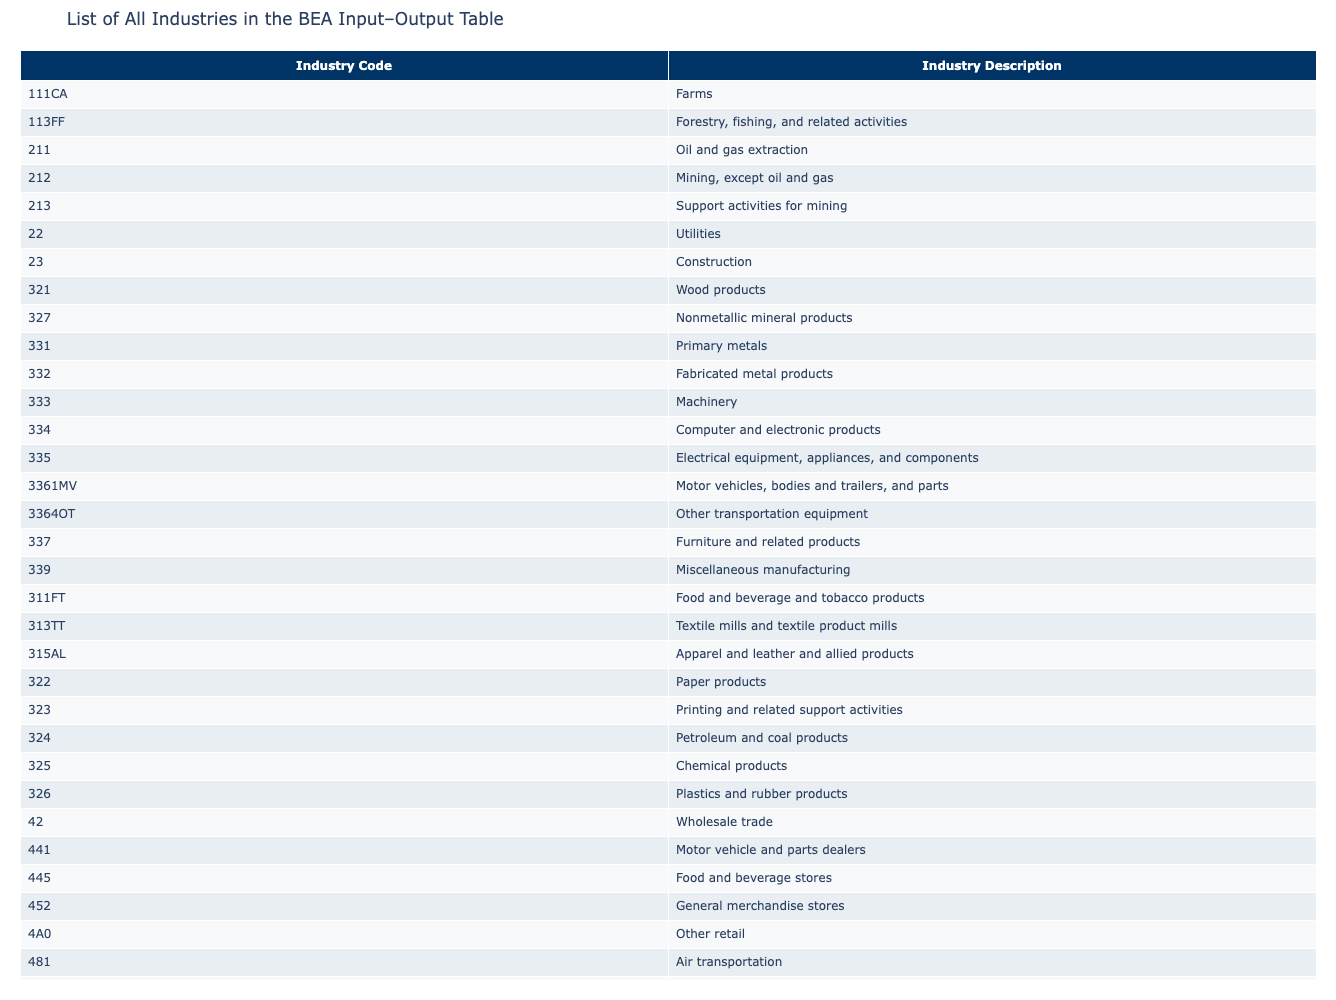

In [112]:
# Displaying the reference table of industry codes and their full names so it is easier to understand

# Extract the first two columns: code + description
industry_table = df.iloc[1:, :2].copy()  # skip the first metadata row

# Rename columns for clarity
industry_table.columns = ["Industry Code", "Industry Description"]

# Reset index for a clean display
industry_table.reset_index(drop=True, inplace=True)

# Display all industries in a scrollable interactive table (via Plotly)
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=["<b>Industry Code</b>", "<b>Industry Description</b>"],
                fill_color="#003366",
                font=dict(color="white", size=12),
                align="center"),
    cells=dict(values=[industry_table["Industry Code"], industry_table["Industry Description"]],
               fill_color=[["#F8F9FB", "#E9EEF3"] * (len(industry_table)//2 + 1)],
               align="left",
               height=28)
)])

fig.update_layout(
    width=800,
    height=1000,
    title="List of All Industries in the BEA Input–Output Table",
    margin=dict(l=20, r=20, t=50, b=20)
)


fig.show()


## Conclusion

The interactive heatmap shows that most industries mainly rely on themselves for production, as seen by the dark diagonal line.  
There are only a few strong connections between different industries, meaning cross-industry dependence is limited.  
Overall, the U.S. economy appears mostly self-sufficient, with only some sectors — like manufacturing and services — linking several industries together.


